In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [2]:
#loading data from csv file to pandas dataframe
df = pd.read_csv("car data.csv")

In [3]:
#checking number of rows and columns
df.shape

(301, 9)

In [4]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [5]:
df.head(301)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
#checking number of missingvalues
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.fillna('Zero')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [9]:
df.dropna()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [10]:
#finding outliers
def find_outliers_IQR(df):

   Q1=df.quantile(0.25)

   Q3=df.quantile(0.75)

   IQR=Q3-Q1

   outliers = df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]

   return outliers

In [11]:
#outliers in Kms_driven
outliers = find_outliers_IQR(df['Kms_Driven'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))

number of outliers: 8
max outlier value: 500000
min outlier value: 104707


In [12]:
#outliers in Selling_price
outliers = find_outliers_IQR(df['Selling_Price'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))

number of outliers: 17
max outlier value: 35.0
min outlier value: 14.25


In [13]:
#outliers in Present_price
outliers = find_outliers_IQR(df['Present_Price'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))

number of outliers: 14
max outlier value: 92.6
min outlier value: 23.15


In [14]:
#Removing outliers
Q1 = df['Selling_Price'].quantile(0.25)
Q3 = df['Selling_Price'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['Selling_Price']=np.where(df['Selling_Price']>upper_whisker,upper_whisker,np.where(df['Selling_Price']<lower_whisker,lower_whisker,df['Selling_Price']))

In [15]:
Q1 = df['Selling_Price'].quantile(0.10)
Q3 = df['Selling_Price'].quantile(0.90)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
index=df['Selling_Price'][(df['Selling_Price']>upper_whisker)|(df['Selling_Price']<lower_whisker)].index
df.drop(index,inplace=True)

In [16]:
Q1 = df['Present_Price'].quantile(0.25)
Q3 = df['Present_Price'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['Present_Price']=np.where(df['Present_Price']>upper_whisker,upper_whisker,np.where(df['Present_Price']<lower_whisker,lower_whisker,df['Present_Price']))

In [17]:
Q1 = df['Present_Price'].quantile(0.10)
Q3 = df['Present_Price'].quantile(0.90)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
index=df['Present_Price'][(df['Present_Price']>upper_whisker)|(df['Present_Price']<lower_whisker)].index
df.drop(index,inplace=True)

In [18]:
Q1 = df['Kms_Driven'].quantile(0.25)
Q3 = df['Kms_Driven'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['Kms_Driven']=np.where(df['Kms_Driven']>upper_whisker,upper_whisker,np.where(df['Kms_Driven']<lower_whisker,lower_whisker,df['Kms_Driven']))

In [19]:
Q1 = df['Kms_Driven'].quantile(0.10)
Q3 = df['Kms_Driven'].quantile(0.90)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
index=df['Kms_Driven'][(df['Kms_Driven']>upper_whisker)|(df['Kms_Driven']<lower_whisker)].index
df.drop(index,inplace=True)

In [20]:
#outliers after removal process
outliers = find_outliers_IQR(df['Present_Price'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))

number of outliers: 0
max outlier value: nan
min outlier value: nan


In [21]:
outliers = find_outliers_IQR(df['Selling_Price'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))

number of outliers: 0
max outlier value: nan
min outlier value: nan


In [22]:
outliers = find_outliers_IQR(df['Kms_Driven'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))

number of outliers: 0
max outlier value: nan
min outlier value: nan


In [23]:
df.head(301)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000.0,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900.0,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200.0,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450.0,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988.0,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000.0,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934.0,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000.0,Diesel,Dealer,Manual,0


In [24]:
#checking the distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [25]:
#Encoding the columns
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [26]:
df.head(301)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000.0,0,0,0,0
1,sx4,2013,4.75,9.54,43000.0,1,0,0,0
2,ciaz,2017,7.25,9.85,6900.0,0,0,0,0
3,wagon r,2011,2.85,4.15,5200.0,0,0,0,0
4,swift,2014,4.60,6.87,42450.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988.0,1,0,0,0
297,brio,2015,4.00,5.90,60000.0,0,0,0,0
298,city,2009,3.35,11.00,87934.0,0,0,0,0
299,city,2017,11.50,12.50,9000.0,1,0,0,0


In [27]:
#Splitting data and target
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [28]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59     27000.0          0            0             0   
1    2013           9.54     43000.0          1            0             0   
2    2017           9.85      6900.0          0            0             0   
3    2011           4.15      5200.0          0            0             0   
4    2014           6.87     42450.0          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60     33988.0          1            0             0   
297  2015           5.90     60000.0          0            0             0   
298  2009          11.00     87934.0          0            0             0   
299  2017          12.50      9000.0          1            0             0   
300  2016           5.90      5464.0          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [29]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [30]:
#Splitting Training and Test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

# Linear Regression

In [31]:
#loading the linear regression model
lin_reg_model = LinearRegression()

In [32]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [33]:
#Prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [34]:
#R square error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.8901084916856978


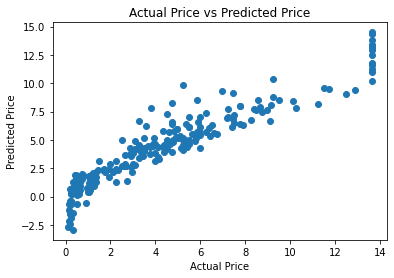

In [35]:
#Visualize the Actual prices and Predicted prices
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [36]:
#Prediction on Test data
test_data_prediction = lin_reg_model.predict(X_test)

In [37]:
#R square error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.8623202551255518


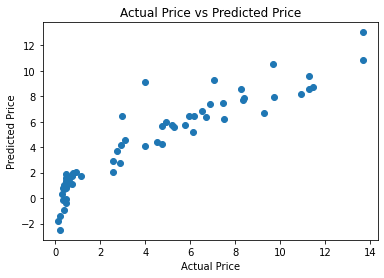

In [38]:
#Visualize the Actual prices and Predicted prices
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

# Lasso Regression

In [39]:
#loading the lasso regression model
lass_reg_model = Lasso()

In [40]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [41]:
#Prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [42]:
#R square error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.8415936049284845


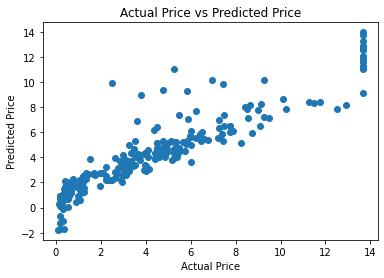

In [43]:
#Visualize the Actual prices and Predicted prices
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [44]:
#Prediction on Test data
test_data_prediction = lass_reg_model.predict(X_test)

In [45]:
#R square error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.8418116140294228


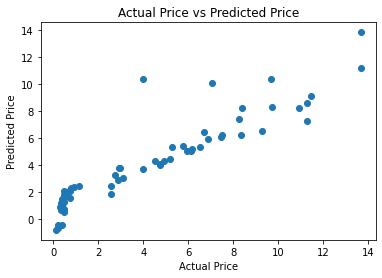

In [46]:
#Visualize the Actual prices and Predicted prices
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

# Random Forest

In [47]:
#loading the Random Forest regressor model
rf_reg_model = RandomForestRegressor()

In [48]:
rf_reg_model.fit(X_train,Y_train)

RandomForestRegressor()

In [49]:
#Prediction on Training data
training_data_prediction = rf_reg_model.predict(X_train)

In [50]:
#R square error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.9873277515203013


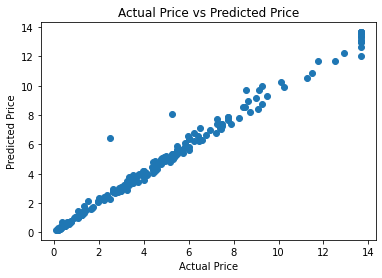

In [51]:
#Visualize the Actual prices and Predicted prices
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [52]:
#Prediction on Test data
test_data_prediction = rf_reg_model.predict(X_test)

In [53]:
#R square error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.9630419871839528


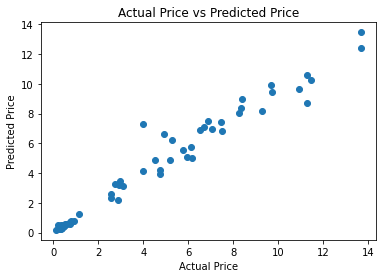

In [54]:
#Visualize the Actual prices and Predicted prices
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

# Gradient Boosting

In [55]:
#loading the Random Forest regressor model
gb_reg_model = GradientBoostingRegressor()

In [56]:
gb_reg_model.fit(X_train,Y_train)

GradientBoostingRegressor()

In [57]:
#Prediction on Training data
training_data_prediction = gb_reg_model.predict(X_train)

In [58]:
#R square error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.9940793065192205


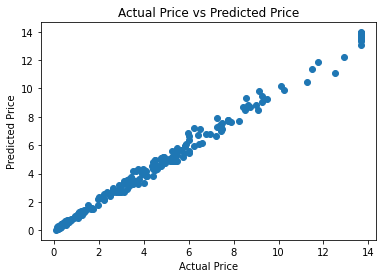

In [59]:
#Visualize the Actual prices and Predicted prices
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [60]:
#Prediction on Test data
test_data_prediction = gb_reg_model.predict(X_test)

In [61]:
#R square error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.9767345800367181


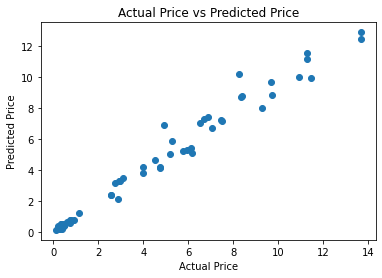

In [62]:
#Visualize the Actual prices and Predicted prices
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()